# Vivarium Interface Demo

This notebook demonstrates the usage of the Vivarium Python API for building, verifying, and saving composite process-bigraph simulations. It includes examples of initializing a simulation, running it, retrieving results, and generating visual diagrams.

In [1]:
from vivarium import Vivarium
from vivarium.tests import DEMO_PROCESSES  # toy processes

In [2]:
# initialize a Vivarium object
v = Vivarium(processes=DEMO_PROCESSES)

In [3]:
# view the available types
print('TYPES:')
v.print_types()

TYPES:
['', 'substance', 'printing_unit/length', 'current*time/mass', 'time', 'integer', 'current', 'length^0_5*mass^0_5', 'any', 'mass/time^3', 'number', 'length^4*mass/current*time^3', 'current*length^2*time', 'tuple', 'length^2/time^2', 'length^1_5*mass^0_5/time', 'current*length^2', 'length^2*mass/current^2*time^3', 'boolean', 'length^2/time', 'mass/length*time', 'length^2*mass/time', 'temperature', 'path', 'length^3/time', 'mass/current*time^2', 'emitter_mode', 'length*time/mass', 'length^2*mass/current*time^2', 'length^1_5*mass^0_5/time^2', 'luminosity', 'current*time', 'length^3', 'current*time/substance', '/printing_unit', 'mass/length*time^2', 'current^2*time^4/length^2*mass', 'length^2*mass/time^3', 'length^2*mass/temperature*time^2', 'quote', 'length^4*mass/time^3', 'length^2*mass/current*time^3', '/substance', 'maybe', 'enum', '/temperature*time', 'edge', 'protocol', 'length*temperature', 'float', 'length/time', 'mass/length', 'length^2*mass/substance*temperature*time^2', '

In [4]:
# view the available processes
print('PROCESSES:')
v.print_processes()

PROCESSES:
['console-emitter', 'ram-emitter', 'increase float', 'composite']


In [5]:
# inspect the config schema for the 'increase' process
print("INCREASE PROCESS CONFIG SCHEMA:")
print(v.process_schema('increase float'))

INCREASE PROCESS CONFIG SCHEMA:
(rate:float)


In [6]:
# inspect the process interface (inputs/outputs) for the 'increase' process
print("INCREASE PROCESS INTERFACE SCHEMA:")
print(v.process_interface('increase float'))

INCREASE PROCESS INTERFACE SCHEMA:
{'inputs': {'amount': {'_type': 'float', '_default': 1.0}}, 'outputs': {'amount': 'float'}}


In [7]:
# add an increase process called 'increase process'
v.add_process(name='increase',
              process_id='increase float',  # this is the process id
              config={'rate': 0.1},         # set according to the config schema
              )

# print the current state
v

Vivarium( 
{ 'global_time': 0.0,
  'increase': { 'address': 'local:increase float',
                'config': {'rate': 0.1},
                'inputs': {},
                'instance': <vivarium.tests.IncreaseFloat object at 0x113f848e0>,
                'interval': 1.0,
                'outputs': {}}})

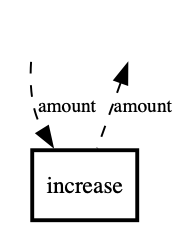

In [8]:
# display as a diagram
v.diagram(dpi='140')

In [9]:
# connect the 'increase' process to the state through its inputs and outputs
v.connect_process(
    process_name='increase',
    inputs={'amount': ['top', 'A']},
    outputs={'amount': ['top', 'A']}
)

# display the current state
v

Vivarium( 
{ 'global_time': 0.0,
  'increase': { 'address': 'local:increase float',
                'config': {'rate': 0.1},
                'inputs': {'amount': ['top', 'A']},
                'instance': <vivarium.tests.IncreaseFloat object at 0x113f848e0>,
                'interval': 1.0,
                'outputs': {'amount': ['top', 'A']}},
  'top': {'A': 1.0}})

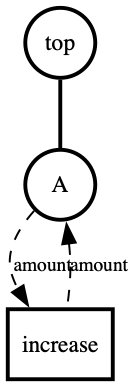

In [10]:
# display the current state as a diagram
v.diagram(dpi='140')

In [11]:
# get the value of 'top.A'
v.get_value(path=['top', 'A'])

1.0

In [12]:
# set value of 'top.A' to 100
v.set_value(path=['top', 'A'], value=100.0)
v.get_value(path=['top', 'A'])

100.0

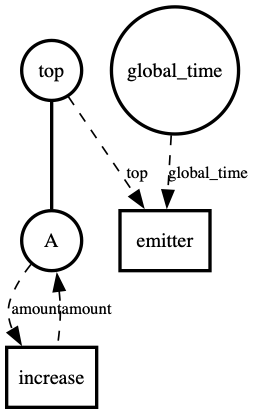

In [13]:
# add an emitter to save the history
v.add_emitter()

# display the current state
v.diagram(dpi='120')

In [14]:
# run the simulation for 10 time units
v.run(interval=10)

In [15]:
# get the timeseries results
timeseries = v.get_timeseries(significant_digits=6)
timeseries

{'global_time': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'top.A': [100.0,
  110.0,
  121.0,
  133.1,
  146.41,
  161.051,
  177.1561,
  194.87171,
  214.358881,
  235.794769,
  259.374246]}

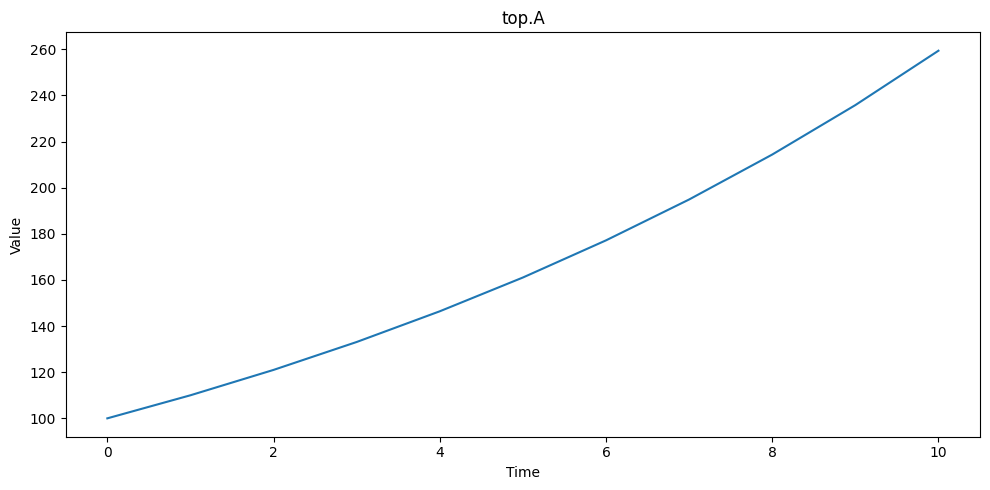

In [16]:
v.plot_timeseries()

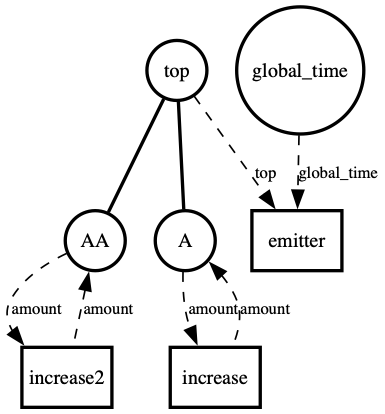

In [17]:
# add more objects
v.add_object(name='AA', path=['top'], value=1)

# add another increase process
v.add_process(name='increase2',
              process_id='increase float',
              config={'rate': 2.0},
              inputs={'amount': ['top', 'AA']},
              outputs={'amount': ['top', 'AA']}
              )

# display the current state
v.diagram(dpi='120')

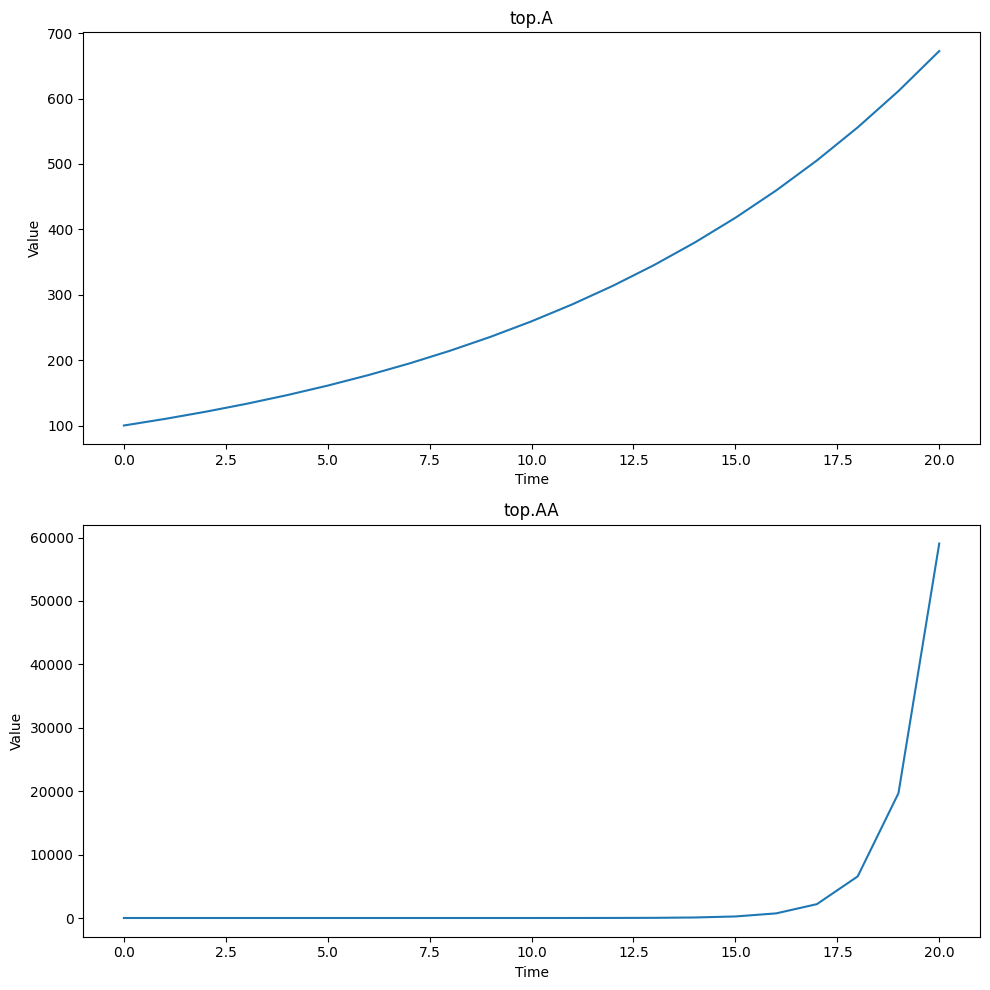

In [18]:
# run the simulation for 10 time units
v.run(interval=10)
v.plot_timeseries()

In [19]:
# save the current state to a file
v.save(filename='demo1')

Saved file: out/demo1.json


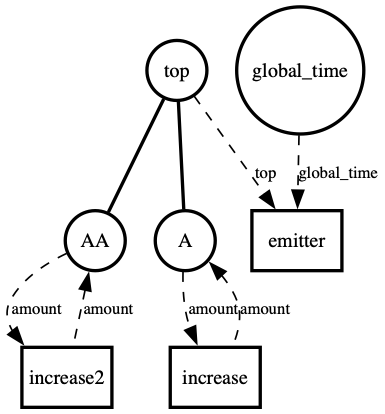

In [20]:
# make a new Vivarium object (v2) from the saved file
v2 = Vivarium(document='out/demo1.json', processes=DEMO_PROCESSES)

# display the current state as a diagram
v2.diagram(dpi='120',         
           show_values=True,
           # show_types=True,
           )

In [21]:
# display the current state
v2

Vivarium( 
{ 'emitter': { 'address': 'local:ram-emitter',
               'config': {'emit': {'global_time': 'any', 'top': 'any'}},
               'inputs': {'global_time': ['global_time'], 'top': ['top']},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x114d83f40>,
               'outputs': {}},
  'global_time': '20.0',
  'increase': { 'address': 'local:increase float',
                'config': {'rate': 0.1},
                'inputs': {'amount': ['top', 'A']},
                'instance': <vivarium.tests.IncreaseFloat object at 0x113f840d0>,
                'interval': 1.0,
                'outputs': {'amount': ['top', 'A']}},
  'increase2': { 'address': 'local:increase float',
                 'config': {'rate': 2.0},
                 'inputs': {'amount': ['top', 'AA']},
                 'instance': <vivarium.tests.IncreaseFloat object at 0x107e66070>,
                 'interval': 1.0,
                 'outputs': {'amount': ['top', 'AA']}},
  'top': {'A': 